# 信号处理仿真与应用 - 数字和模拟滤波器 - 数字滤波

## bandstop

#### 音调的带阻滤波

**和MATLAB波形一致**

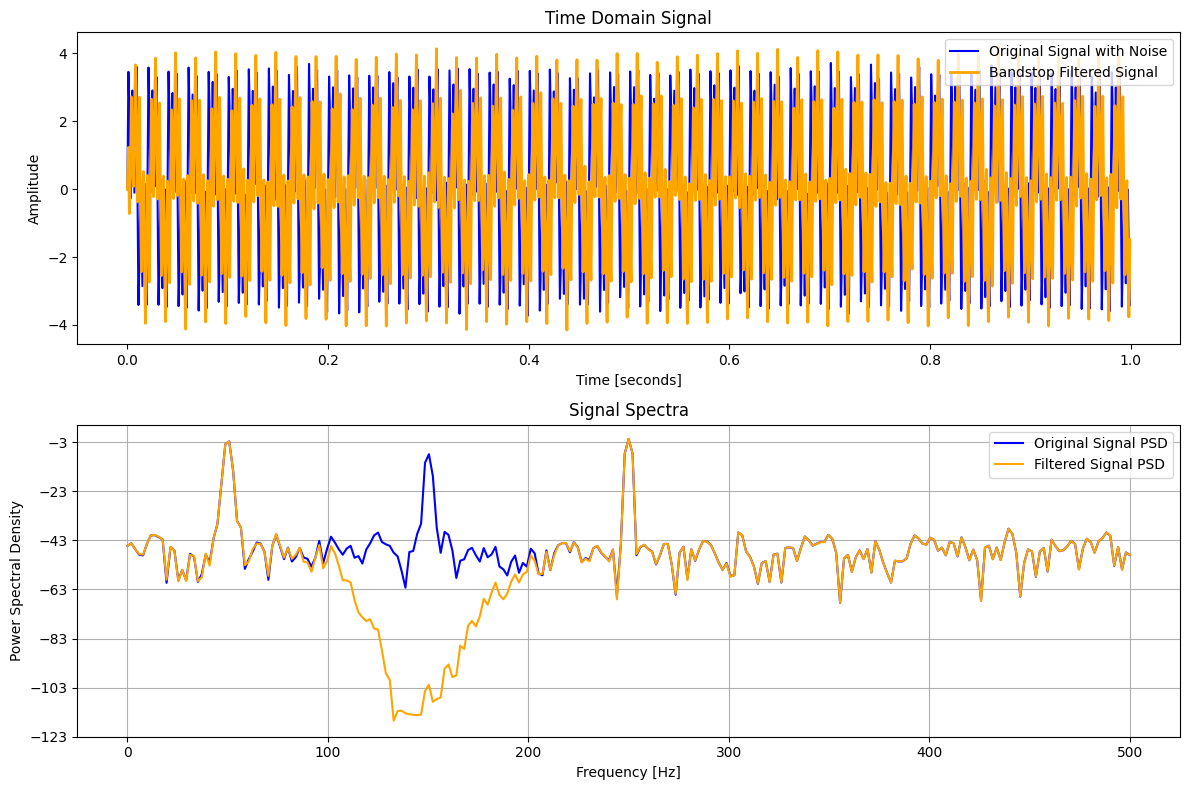

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# 设置采样频率和时间向量
fs = 1000  # 采样频率为1 kHz
t = np.linspace(0, 1, fs, endpoint=False)  # 持续1秒

# 生成信号
frequencies = np.array([50, 150, 250])
amplitudes = np.array([2, 1, 2])
signal = (amplitudes[0] * np.sin(2 * np.pi * frequencies[0] * t) +
          amplitudes[1] * np.sin(2 * np.pi * frequencies[1] * t) +
          amplitudes[2] * np.sin(2 * np.pi * frequencies[2] * t))

# 添加高斯白噪声
noise = np.random.randn(fs) / 10
x = signal + noise

# 定义带阻滤波器函数
def bandstop_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs  # 奈奎斯特频率
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandstop')
    y = lfilter(b, a, data)
    return y

# 应用带阻滤波器
filtered_signal = bandstop_filter(x, 100, 200, fs, order=5)

# 绘制原始信号和滤波信号及其频谱
plt.figure(figsize=(12, 8))

# 绘制时域信号
plt.subplot(2, 1, 1)
plt.plot(t, x, label='Original Signal with Noise', color='blue')
plt.plot(t, filtered_signal, label='Bandstop Filtered Signal', color='orange', linewidth=2)
plt.title('Time Domain Signal')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.legend()

# 绘制频率响应
plt.subplot(2, 1, 2)
plt.psd(x, Fs=fs, NFFT=512, label='Original Signal PSD', color='blue')
plt.psd(filtered_signal, Fs=fs, NFFT=512, label='Filtered Signal PSD', color='orange')
plt.title('Signal Spectra')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density')
plt.legend()

plt.tight_layout()
plt.show()



**采用文件调用**

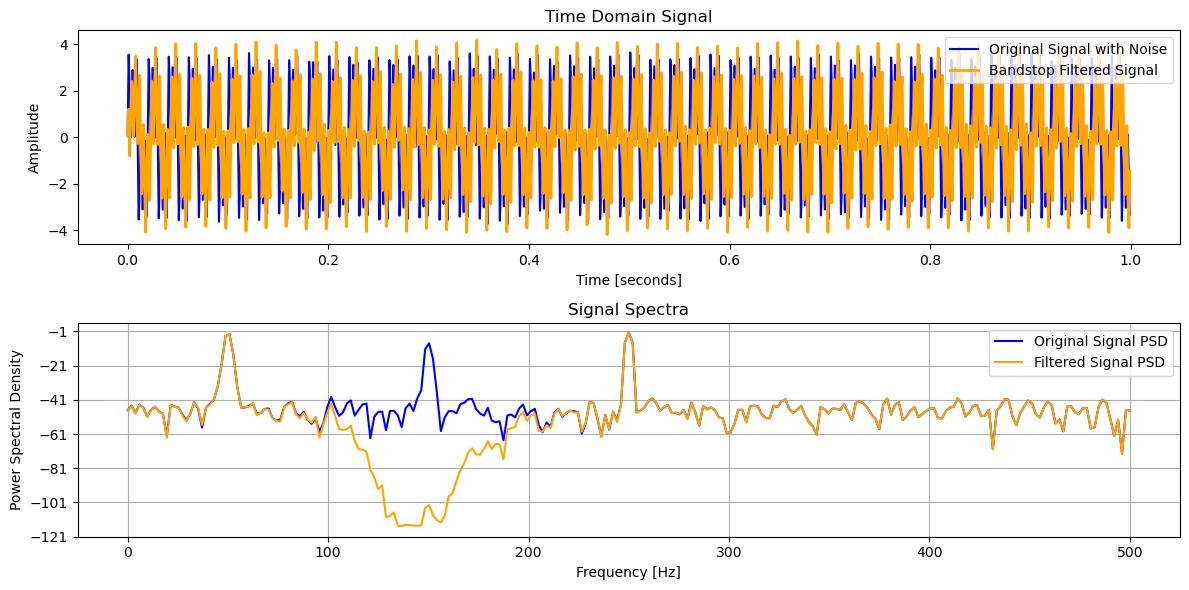

In [1]:
# File: main_script.py
import numpy as np
import matplotlib.pyplot as plt
from bandstop import bandstop

# Set the sampling frequency and create the time vector
fs = 1000  # Sampling frequency: 1 kHz
t = np.linspace(0, 1, fs, endpoint=False)  # Duration: 1 second

# Generate the signal: contains three tones 50 Hz, 150 Hz, 250 Hz
frequencies = np.array([50, 150, 250])
amplitudes = np.array([2, 1, 2])
signal = np.sum([amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t) for i in range(len(frequencies))], axis=0)

# Add Gaussian white noise
noise = np.random.randn(fs) / 10
x = signal + noise

# Apply the bandstop filter with specified stop band between 100 Hz and 200 Hz
filtered_signal = bandstop(x, [100, 200], fs, order=5)

# Plotting
plt.figure(figsize=(12, 6))

# Time domain signals
plt.subplot(2, 1, 1)
plt.plot(t, x, label='Original Signal with Noise', color='blue')
plt.plot(t, filtered_signal, label='Bandstop Filtered Signal', color='orange', linewidth=2)
plt.title('Time Domain Signal')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.legend()

# Frequency response (Power Spectral Density)
plt.subplot(2, 1, 2)
plt.psd(x, Fs=fs, NFFT=512, label='Original Signal PSD', color='blue')
plt.psd(filtered_signal, Fs=fs, NFFT=512, label='Filtered Signal PSD', color='orange')
plt.title('Signal Spectra')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density')
plt.legend()

plt.tight_layout()
plt.show()
